In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range
import time
from datetime import timedelta

In [2]:
total_data = pickle.load( open( "total_data.p", "rb" ) )

In [3]:
total_data[0:33401].shape

(33401, 64, 64, 1)

In [4]:
total_labels = pickle.load( open( "total_labels.p", "rb" ) )

In [5]:
total_labels.shape

(33401, 5, 11)

In [6]:
total_test_data = pickle.load( open( "total_test_data.p", "rb" ) )

In [7]:
total_test_labels = pickle.load( open( "total_test_labels.p", "rb" ) )

In [8]:
total_test_data = total_test_data[0:13066]
total_test_data.shape

(13066, 64, 64, 1)

In [9]:
total_test_labels[:,0].shape

(13066, 11)

In [10]:
def accuracy2(pred_labels1,pred_labels2,pred_labels3,pred_labels4,pred_labels5,true_labels1,true_labels2,true_labels3,true_labels4,true_labels5):
    ar = np.sum((np.array([np.argmax(pred_labels1, 1), np.argmax(pred_labels2, 1),np.argmax(pred_labels3, 1),np.argmax(pred_labels4, 1),np.argmax(pred_labels5, 1)]) 
  == np.array([np.argmax(true_labels1, 1),np.argmax(true_labels2, 1),np.argmax(true_labels3, 1),np.argmax(true_labels4, 1),np.argmax(true_labels5, 1)])),axis=0)
    count = 0
    for elem in ar:
        if elem == 5:
            count = count + 1
    return ((100.0 * count)/pred_labels1.shape[0])

In [11]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

In [13]:
batch_size = 16
patch_size = 5 #Convolution filters are 5 x 5 pixels.
depth = 16
num_hidden = 32  # Number of neurons in fully-connected layer.
image_size = 64
num_labels = 11
num_channels = 1 # grayscale # Number of colour channels for the images: 1 channel for gray-scale.


graph = tf.Graph()

with graph.as_default():

  # Input data.
    tf_train_dataset = tf.placeholder(
        tf.float32, shape=(batch_size, image_size, image_size, num_channels))
    tf_train_labels0 = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_train_labels1 = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_train_labels2 = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_train_labels3 = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_train_labels4 = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  #tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.placeholder(
        tf.float32, shape=(batch_size, image_size, image_size, num_channels))
    tf_test_labels0 = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_test_labels1 = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_test_labels2 = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_test_labels3 = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_test_labels4 = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    

# Variables.
    layer1_weights = tf.Variable(tf.truncated_normal(
        [patch_size, patch_size, num_channels, depth], stddev=0.1))
    layer1_biases = tf.Variable(tf.zeros([depth]))
    layer2_weights = tf.Variable(tf.truncated_normal(
        [patch_size, patch_size, depth, depth], stddev=0.1))
    layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth]))
    layer3_weights = tf.Variable(tf.truncated_normal(
        [image_size // 4 * image_size // 4 * depth, num_hidden], stddev=0.1))
    layer3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
    layer4_weights = tf.Variable(tf.truncated_normal(
        [num_hidden, num_labels], stddev=0.1))
    layer4_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
    layer4_weights_out1 = tf.Variable(tf.truncated_normal(
        [num_hidden, num_labels], stddev=0.1), dtype= tf.float32, name = "weightsout1")
    layer4_biases_out1 = tf.Variable(tf.constant(1.0, shape=[num_labels]), name = "biasout1")
    layer4_weights_out2 = tf.Variable(tf.truncated_normal(
        [num_hidden, num_labels], stddev=0.1), dtype= tf.float32, name = "weightsout2")
    layer4_biases_out2 = tf.Variable(tf.constant(1.0, shape=[num_labels]), name = "biasout2")
    layer4_weights_out3 = tf.Variable(tf.truncated_normal(
        [num_hidden, num_labels], stddev=0.1), dtype= tf.float32, name = "weightsout3")
    layer4_biases_out3 = tf.Variable(tf.constant(1.0, shape=[num_labels]), name = "biasout3")
    layer4_weights_out4 = tf.Variable(tf.truncated_normal(
        [num_hidden, num_labels], stddev=0.1), dtype= tf.float32, name = "weightsout4")
    layer4_biases_out4 = tf.Variable(tf.constant(1.0, shape=[num_labels]), name = "biasout4")
    layer4_weights_out5 = tf.Variable(tf.truncated_normal(
        [num_hidden, num_labels], stddev=0.1), dtype= tf.float32, name = "weightsout5")
    layer4_biases_out5 = tf.Variable(tf.constant(1.0, shape=[num_labels]), name = "biasout5")



  # Model.
    def model(data):
        
        conv = tf.nn.conv2d(data, layer1_weights, [1, 1, 1, 1], padding='SAME')
        hidden = tf.nn.relu(conv + layer1_biases)
        h_pool1 = tf.nn.max_pool(hidden,ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='SAME')
        conv = tf.nn.conv2d(h_pool1, layer2_weights, [1, 1, 1, 1], padding='SAME')
        #h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
        hidden = tf.nn.relu(conv + layer2_biases)
        h_pool2 = tf.nn.max_pool(hidden,ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='SAME')
        shape = h_pool2.get_shape().as_list()
        reshape = tf.reshape(h_pool2, [shape[0], shape[1] * shape[2] * shape[3]])
        hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
        logits1 = tf.matmul(hidden, layer4_weights_out1) + layer4_biases_out1
        logits2 = tf.matmul(hidden, layer4_weights_out2) + layer4_biases_out2
        logits3 = tf.matmul(hidden, layer4_weights_out3) + layer4_biases_out3
        logits4 = tf.matmul(hidden, layer4_weights_out4) + layer4_biases_out4
        logits5 = tf.matmul(hidden, layer4_weights_out5) + layer4_biases_out5
        
        return logits1, logits2, logits3, logits4, logits5


  
  # Training computation.
    logits1, logits2, logits3, logits4, logits5 = model(tf_train_dataset)
    loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits1, tf_train_labels0)) + tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits2, tf_train_labels1)) + tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits3, tf_train_labels2)) + tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits4, tf_train_labels3)) + tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits5, tf_train_labels4))
    
    #global_step = tf.Variable(0)
    #learning_rate = tf.train.exponential_decay(0.1, global_step, 1000, 0.96, staircase=True )
  # Optimizer.
    #optimizer = tf.train.MomentumOptimizer(learning_rate=0.025, momentum = 0.9).minimize(loss)
    optimizer = tf.train.AdagradOptimizer(0.05).minimize(loss)
  
# Predictions for the training, validation, and test data.
    train_prediction1 = tf.nn.softmax(logits1)
    train_prediction2 = tf.nn.softmax(logits2)
    train_prediction3 = tf.nn.softmax(logits3)
    train_prediction4 = tf.nn.softmax(logits4)
    train_prediction5 = tf.nn.softmax(logits5)
    #valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
    test_prediction1 = tf.nn.softmax(model(tf_test_dataset)[0])
    test_prediction2 = tf.nn.softmax(model(tf_test_dataset)[1])
    test_prediction3 = tf.nn.softmax(model(tf_test_dataset)[2])
    test_prediction4 = tf.nn.softmax(model(tf_test_dataset)[3])
    test_prediction5 = tf.nn.softmax(model(tf_test_dataset)[4])

In [14]:
num_steps = 10001
t_num_steps = 13066 // 16
test_acc = []
test_acc_seq = []

with tf.Session(graph=graph) as session:
        
        # Start-time used for printing time-usage below.
    start_time = time.time()
    
    tf.initialize_all_variables().run()

    print('Initialized')
    for step in range(num_steps):
        offset = (step * batch_size) % (total_labels[:,0].shape[0] - batch_size)
        batch_data = total_data[0:33401][offset:(offset + batch_size), :, :, :]
        batch_labels0 = total_labels[:,0][offset:(offset + batch_size), :]
        batch_labels1 = total_labels[:,1][offset:(offset + batch_size), :]
        batch_labels2 = total_labels[:,2][offset:(offset + batch_size), :]
        batch_labels3 = total_labels[:,3][offset:(offset + batch_size), :]
        batch_labels4 = total_labels[:,4][offset:(offset + batch_size), :]
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels0 : batch_labels0,
                     tf_train_labels1 : batch_labels1, tf_train_labels2 : batch_labels2, 
                     tf_train_labels3 : batch_labels3, tf_train_labels4 : batch_labels4}
        _, l, predictions1, predictions2, predictions3, predictions4, predictions5 = session.run(
          [optimizer, loss, train_prediction1, train_prediction2, train_prediction3,
           train_prediction4, train_prediction5], feed_dict=feed_dict)
    
        if (step % 500 == 0):
          print('Minibatch loss at step %d: %f' % (step, l))
          a1 = accuracy(predictions1, batch_labels0)
          a2 = accuracy(predictions2, batch_labels1)
          a3 = accuracy(predictions3, batch_labels2)
          a4 = accuracy(predictions4, batch_labels3)
          a5 = accuracy(predictions5, batch_labels4)
          print('Minibatch accuracy of 1st digit: %.1f%%' % accuracy(predictions1, batch_labels0))
          print('Minibatch accuracy: %.1f%%' % np.mean(np.array((a1,a2,a3,a4,a5),dtype = np.float32)))
          print('Minibatch accuracy of sequence: %.1f%%' % accuracy2(predictions1,predictions2,
                                                                     predictions3,predictions4,
                                                                     predictions5,batch_labels0,
                                                                     batch_labels1,batch_labels2,
                                                                     batch_labels3,batch_labels4))
        
    for step in range(t_num_steps):
        offset = (step * batch_size) % (total_test_labels[:,0].shape[0] - batch_size)
        batch_test_data = total_test_data[offset:(offset + batch_size), :, :, :]
        batch_test_labels0 = total_test_labels[:,0][offset:(offset + batch_size), :]
        batch_test_labels1 = total_test_labels[:,1][offset:(offset + batch_size), :]
        batch_test_labels2 = total_test_labels[:,2][offset:(offset + batch_size), :]
        batch_test_labels3 = total_test_labels[:,3][offset:(offset + batch_size), :]
        batch_test_labels4 = total_test_labels[:,4][offset:(offset + batch_size), :]
        feed_dict = {tf_test_dataset : batch_test_data, tf_test_labels0 : batch_test_labels0,
                     tf_test_labels1 : batch_test_labels1, tf_test_labels2 : batch_test_labels2, 
                     tf_test_labels3 : batch_test_labels3, tf_test_labels4 : batch_test_labels4}
        t_prediction1, t_prediction2, t_prediction3, t_prediction4, t_prediction5 = session.run(
          [test_prediction1, test_prediction2, test_prediction3,
           test_prediction4, test_prediction5], feed_dict=feed_dict)
    
        if (step % 50 == 0):
            #print('Minibatch loss at step %d: %f' % (step, l))
            t1 = accuracy(t_prediction1, batch_test_labels0)
            t2 = accuracy(t_prediction2, batch_test_labels1)
            t3 = accuracy(t_prediction3, batch_test_labels2)
            t4 = accuracy(t_prediction4, batch_test_labels3)
            t5 = accuracy(t_prediction5, batch_test_labels4)
            print('Test accuracy of mini-batch: %.1f%%' % np.mean(np.array((t1,t2,t3,t4,t5),dtype = np.float32)))
            test_acc.append(np.mean(np.array((t1,t2,t3,t4,t5),dtype = np.float32)))
            t_acc_seq = accuracy2(t_prediction1, t_prediction2, t_prediction3, t_prediction4,
                                  t_prediction5, batch_test_labels0, batch_test_labels1,
                                  batch_test_labels2, batch_test_labels3, batch_test_labels4)
            print('Test accuracy of sequence:  %.1f%%' % t_acc_seq)
            test_acc_seq.append(t_acc_seq)
            
            
    print('Total Test accuracy : %.1f%%' % np.mean(test_acc))
    print('Total Test accuracy sequence: %.1f%%' % np.mean(test_acc_seq))
    
        # Ending time.
    end_time = time.time()
    
    time_dif = end_time - start_time

    # Print the time-usage.
    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))
    
[0,0,6.2,6.2,6.2,0,25,12.5,18.8,18.8,25,25,43.8,31.2,50,43.8,37.3,37.3,43.8,50]

Initialized
Minibatch loss at step 0: 16.267078
Minibatch accuracy of 1st digit: 0.0%
Minibatch accuracy: 5.0%
Minibatch accuracy of sequence: 0.0%
Minibatch loss at step 500: 5.738986
Minibatch accuracy of 1st digit: 12.5%
Minibatch accuracy: 65.0%
Minibatch accuracy of sequence: 0.0%
Minibatch loss at step 1000: 6.612051
Minibatch accuracy of 1st digit: 37.5%
Minibatch accuracy: 60.0%
Minibatch accuracy of sequence: 6.2%
Minibatch loss at step 1500: 5.434232
Minibatch accuracy of 1st digit: 37.5%
Minibatch accuracy: 66.2%
Minibatch accuracy of sequence: 6.2%
Minibatch loss at step 2000: 6.687022
Minibatch accuracy of 1st digit: 43.8%
Minibatch accuracy: 60.0%
Minibatch accuracy of sequence: 6.2%
Minibatch loss at step 2500: 5.342072
Minibatch accuracy of 1st digit: 62.5%
Minibatch accuracy: 63.8%
Minibatch accuracy of sequence: 0.0%
Minibatch loss at step 3000: 3.756052
Minibatch accuracy of 1st digit: 43.8%
Minibatch accuracy: 77.5%
Minibatch accuracy of sequence: 25.0%
Minibatch lo

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt


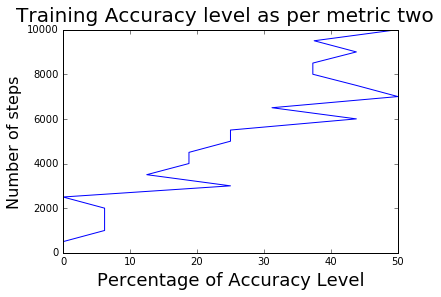

In [9]:
plt.plot([0,0,6.2,6.2,6.2,0,25,12.5,18.8,18.8,25,25,43.8,31.2,50,43.8,37.3,37.3,43.8,37.5,50],
         [x for x in range(0,10500,500)])
plt.suptitle('Training Accuracy level as per metric two', fontsize=20)
plt.xlabel('Percentage of Accuracy Level', fontsize=18)
plt.ylabel('Number of steps', fontsize=16)
plt.show()